In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Helper functions and variables created for the project
import helper_functions as hf
import helper_variables

# Magic commands for visualization
%matplotlib inline

In [2]:
dates_to_parse = ['founded_at', 'first_funding_at', 'last_funding_at']

startup_df = pd.read_csv('data/startup_processed_data.csv', parse_dates=dates_to_parse)

In [3]:
startup_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 36 columns):
 #   Column                                                   Non-Null Count  Dtype         
---  ------                                                   --------------  -----         
 0   Unnamed: 0                                               66368 non-null  int64         
 1   permalink                                                66368 non-null  object        
 2   name                                                     66368 non-null  object        
 3   homepage_url                                             66368 non-null  object        
 4   funding_total_usd                                        66368 non-null  float64       
 5   status                                                   66368 non-null  object        
 6   country_code                                             66368 non-null  object        
 7   state_code                                       

### **1. Measuring Central Tendency and Spread**

Identify the variables associated with total funding raised by a startup and the number of funding rounds in the aforesaid dataset and analyse them using various methods of central tendency and measures of spread. Describe your results and explain the type of variables observed.

**Basic Descriptive Statistics**

* Central Tendency: Mean, Median
* Spread: Standard Deviation, Variance, Range, Interquartile Range (IQR)

Using helper function for computing statistics describing central tendency and spread

In [4]:
stats_dict_total_usd = hf.central_tendency_spread(startup_df, 
                                                  'funding_total_usd', 
                                                  table=True)

stats_dict_fund_rnds = hf.central_tendency_spread(startup_df, 
                                                  'funding_rounds', 
                                                  table=True)

<--- funding_total_usd Statistics --->
     mean_value  median_value     std_value     var_value   range_value  \
0  1.491892e+07     1000000.0  1.690930e+08  2.859244e+16  3.007950e+10   

   Q1_value    Q3_value   IQR_value  
0   40000.0  6800473.25  6760473.25  

<--- funding_rounds Statistics --->
   mean_value  median_value  std_value  var_value  range_value  Q1_value  \
0    1.732522           1.0   1.360251   1.850283           18       1.0   

   Q3_value  IQR_value  
0       2.0        1.0  



| Metric                   | Mean Value        | Median Value   | Standard Deviation | Variance       | Range Value     | Q1 Value      | Q3 Value       | Interquartile Range |
|--------------------------|-------------------|----------------|--------------------|----------------|-----------------|---------------|----------------|---------------------|
| Funding Total (USD)      | \$14.92M          | \$1.00M        | \$169.09M          | \$28.59T       | \$30.08B        | \$40K         | \$6.80M        | \$6.76M             |
| Funding Rounds           | 1.73              | 1.0            | 1.36               | 1.85           | 18.0            | 1.0           | 2.0            | 1.0                 |



**Data Visualization**

Histograms and Boxplots are great for visualizing the distribution of these variables.

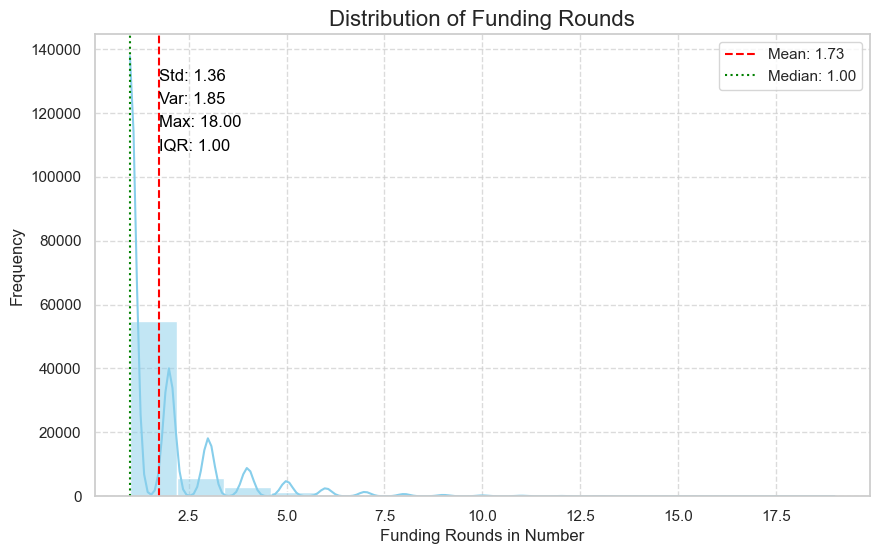

In [7]:
graph_data = {
    'Title': 'Distribution of Funding Rounds',
    'x_label': 'Funding Rounds in Number',
    'y_label': 'Frequency'
}

# Plotting histogram for 'funding_rounds' variable
hf.plot_histogram(startup_df, 
                  'funding_rounds', 
                  graph_data)

We will not plot the boxplot for the total funding in USD since graphical representation would not provide any insights since the data is quite broad. For that we need to first hanlde the outliers and provide a better graphical representation.

However, we can indeed plot the boxplot for the funding round since it is less scarce and can provide visual insights

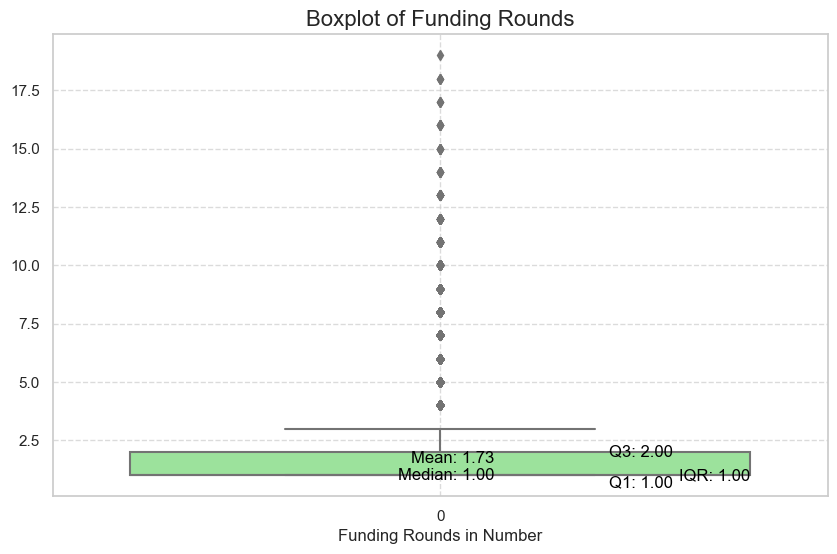

In [8]:
graph_data = {
    'Title': 'Boxplot of Funding Rounds',
    'x_label': 'Funding Rounds in Number',
}

# Plotting boxplot for 'funding_rounds' variable
hf.plot_boxplot(startup_df, 
                'funding_rounds',
                graph_data)

**Correlation Analysis**

To understand the relationship between the two variables, we can comput the correlation between variables (in this case 2) and provide with a graphical representation.

**Scatter Plot and Heatmap for Correlation Analysis**

Visualize the relationship between 'funding_rounds' and 'funding_total_usd'.

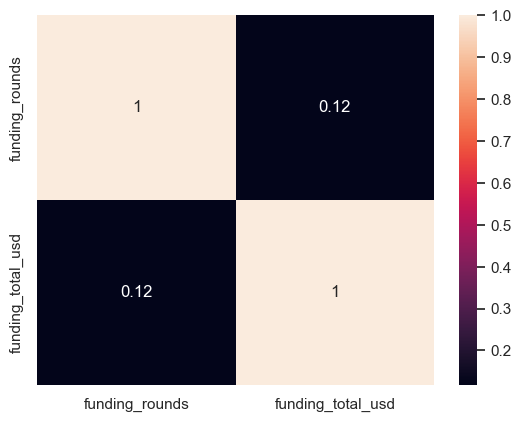

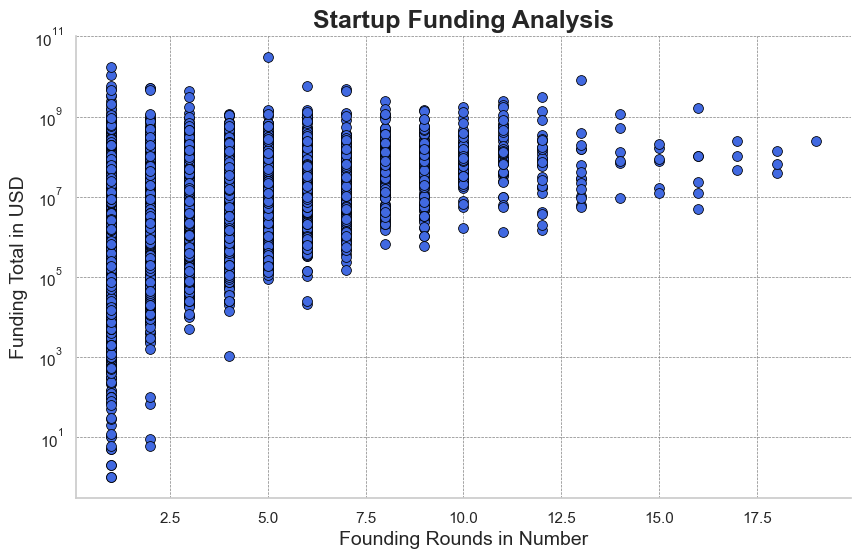

In [9]:
graph_data = {
    'Title': 'Startup Funding Analysis',
    'x_label': 'Founding Rounds in Number',
    'y_label': 'Funding Total in USD',
}

corr_total_usd_rounds = hf.corr_two_var(startup_df, 
                                            ['funding_rounds', 'funding_total_usd'],
                                            graph_data)

### **2. Outlier Analysis**

Examine the aforesaid two variables in Question 2 for possible outliers. You have to identify the cutoff values of those outliers on both ends. Then perform the following operations to understand your extreme observations.

The outlier bounds will be computed folloring the formula:

lower_bound = Q1 - 1.5 * IQR

upper_bound = Q3 + 1.5 * IQR

We start computing the lower and upper bound values for 'funding_total_usd' and 'funding_rounds' variables. again, the data will be to scarce still to get any useful visual representation, so we will stick to the numerical values for the 'funding_total_usd' and 'funding_rounds' variables.

In [11]:
# Computing lower and upper bounds for 'funding_rounds'
dict_bounds = hf.detect_outliers(startup_df, 
                                 ['funding_total_usd', 'funding_rounds'], 
                                 plot=False)

In [12]:
print('---> funding_total_usd lower bound: {}'.format(dict_bounds['l_bound_funding_total_usd']))
print('---> funding_total_usd upper bound: {}'.format(dict_bounds['u_bound_funding_total_usd']))
print('---> funding_rounds lower bound: {}'.format(dict_bounds['l_bound_funding_rounds']))
print('---> funding_rounds upper bound: {}'.format(dict_bounds['u_bound_funding_rounds']))

---> funding_total_usd lower bound: -10100709.875
---> funding_total_usd upper bound: 16941183.125
---> funding_rounds lower bound: -0.5
---> funding_rounds upper bound: 3.5


**A.** Drop the outliers from the dataset and repeat the procedure in Question 2 to draw conclusions. Report your observations extensively and in as much detail as possible.

In [14]:
# Dropping outliers from the dataframe based on the computed bounds
startup_drop_out_df = hf.drop_outliers(startup_df, 
                                       dict_bounds, 
                                       ['funding_total_usd', 'funding_rounds'])

**Basic Descriptive Statistics (No Outliers)**

* Central Tendency: Mean, Median
* Spread: Standard Deviation, Variance, Range, Interquartile Range (IQR)

In [15]:
stats_drop_out_total_usd = hf.central_tendency_spread(startup_drop_out_df, 
                                                    'funding_total_usd',
                                                    table=True)

stats_drop_out_fund_rnds = hf.central_tendency_spread(startup_drop_out_df, 
                                                    'funding_rounds', 
                                                    table=True)

<--- funding_total_usd Statistics --->
     mean_value  median_value     std_value     var_value  range_value  \
0  2.131227e+06      410000.0  3.551139e+06  1.261059e+13   16940000.0   

   Q1_value   Q3_value  IQR_value  
0   12000.0  2500000.0  2488000.0  

<--- funding_rounds Statistics --->
   mean_value  median_value  std_value  var_value  range_value  Q1_value  \
0    1.335364           1.0   0.605209   0.366279            2       1.0   

   Q3_value  IQR_value  
0       2.0        1.0  



| Metric                   | Mean Value        | Median Value   | Standard Deviation | Variance       | Range Value   | Q1 Value      | Q3 Value       | Interquartile Range |
|--------------------------|-------------------|----------------|--------------------|----------------|---------------|---------------|----------------|---------------------|
| Funding Total (USD)      | \$2.13M           | \$410K         | \$3.55M            | \$12.61B       | \$16.94M      | \$12K         | \$2.50M        | \$2.49M             |
| Funding Rounds           | 1.34              | 1.0            | 0.61               | 0.37           | 2.0           | 1.0           | 2.0            | 1.0                 |


**Data Visualization (No Outliers)**

Histograms and Boxplots are great for visualizing the distribution of these variables.

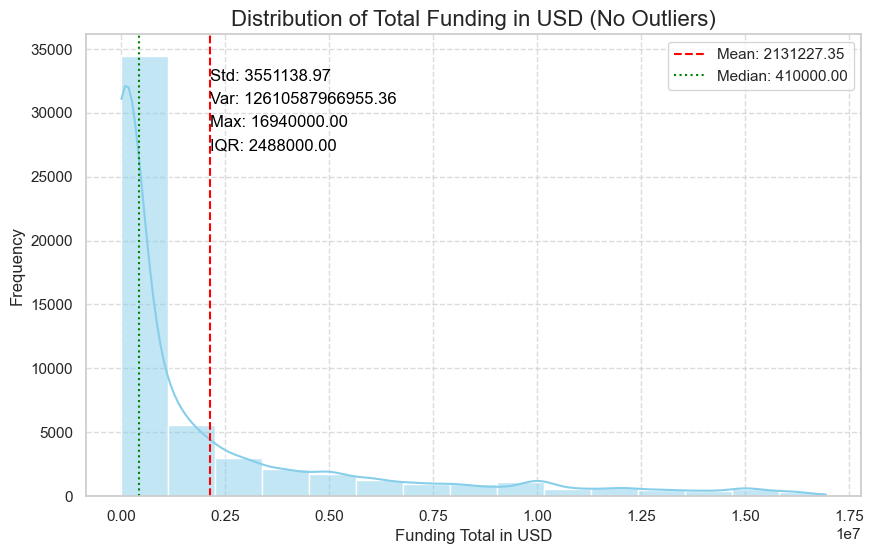

In [17]:
graph_data = {
    'Title': 'Distribution of Total Funding in USD (No Outliers)',
    'x_label': 'Funding Total in USD',
    'y_label': 'Frequency'
}

# Plotting boxplot for 'funding_rounds' variable
hf.plot_histogram(startup_drop_out_df, 
                  'funding_total_usd', 
                  graph_data)

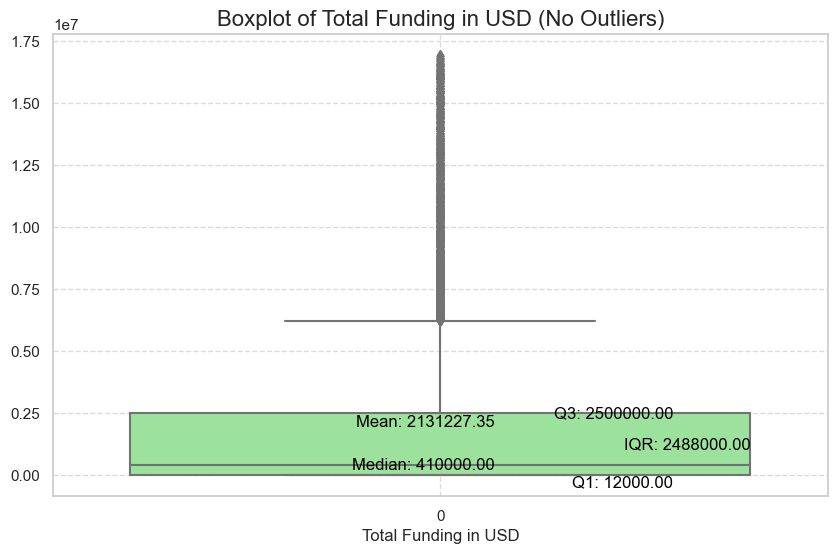

In [18]:
graph_data = {
    'Title': 'Boxplot of Total Funding in USD (No Outliers)',
    'x_label': 'Total Funding in USD',
}

# Plotting boxplot for 'funding_total_usd' variable
hf.plot_boxplot(startup_drop_out_df, 
                'funding_total_usd', 
                graph_data)

**Correlation Analysis (No Outliers)**

To understand the relationship between the two variables, we can comput the correlation between variables (in this case 2) and provide with a graphical representation.

**Scatter Plot and Heatmap for Correlation Analysis (No Outliers)**

Visualize the relationship between 'funding_rounds' and 'funding_total_usd'.

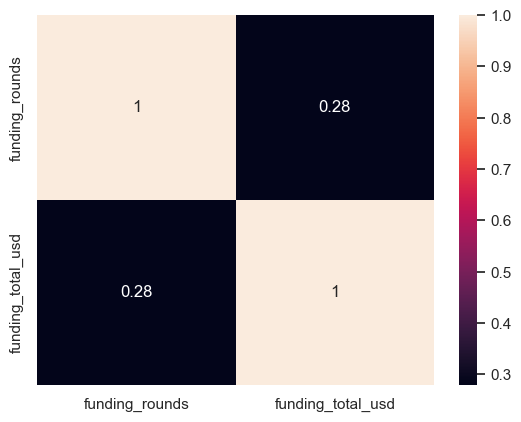

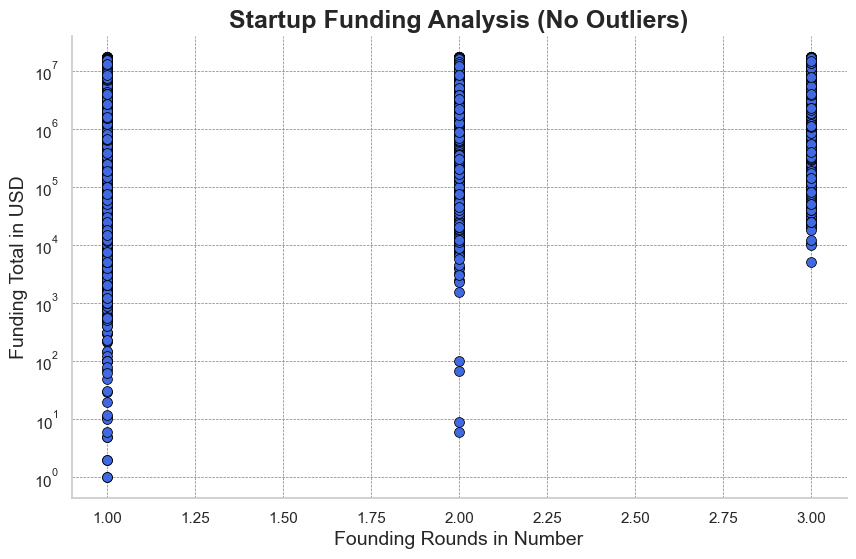

In [21]:
graph_data = {
    'Title': 'Startup Funding Analysis (No Outliers)',
    'x_label': 'Founding Rounds in Number',
    'y_label': 'Funding Total in USD',
}

corr_total_usd_rounds = hf.corr_two_var(startup_drop_out_df, 
                                            ['funding_rounds', 'funding_total_usd'],
                                            graph_data)

**B.** Impute the outliers in the dataset with the value of mean and repeat the procedure in Question 2 to draw conclusions. Report in writing your observations extensively and in as much detail as possible.

In [23]:
# Impute outliers for 'funding_rounds' and 'funding_total_usd'
startup_mean_out_df = hf.impute_outliers_mean(startup_df, 
                                                   ['funding_rounds', 'funding_total_usd'], 
                                                   dict_bounds)

**Basic Descriptive Statistics (Outliers Mean Imputation)**

* Central Tendency: Mean, Median
* Spread: Standard Deviation, Variance, Range, Interquartile Range (IQR)

In [24]:
stats_mean_out_total_usd = hf.central_tendency_spread(startup_mean_out_df, 
                                                    'funding_total_usd',
                                                    table=True)

stats_mean_out_fund_rnds = hf.central_tendency_spread(startup_mean_out_df, 
                                                    'funding_rounds', 
                                                    table=True)

<--- funding_total_usd Statistics --->
     mean_value  median_value     std_value     var_value  range_value  \
0  2.295940e+06     1000000.0  3.415279e+06  1.166413e+13   16940000.0   

   Q1_value      Q3_value     IQR_value  
0   40000.0  2.295940e+06  2.255940e+06  

<--- funding_rounds Statistics --->
   mean_value  median_value  std_value  var_value  range_value  Q1_value  \
0    1.389949           1.0   0.620927   0.385551          2.0       1.0   

   Q3_value  IQR_value  
0       2.0        1.0  



| Metric                   | Mean Value        | Median Value   | Standard Deviation | Variance       | Range Value   | Q1 Value      | Q3 Value       | Interquartile Range |
|--------------------------|-------------------|----------------|--------------------|----------------|---------------|---------------|----------------|---------------------|
| Funding Total (USD)      | \$2.30M           | \$1.00M        | \$3.42M            | \$11.66B       | \$16.94M      | \$40K         | \$2.30M        | \$2.26M             |
| Funding Rounds           | 1.39              | 1.0            | 0.62               | 0.39           | 2.0           | 1.0           | 2.0            | 1.0                 |


**Data Visualization (Outliers Mean Imputation)**

Histograms and Boxplots are great for visualizing the distribution of these variables.

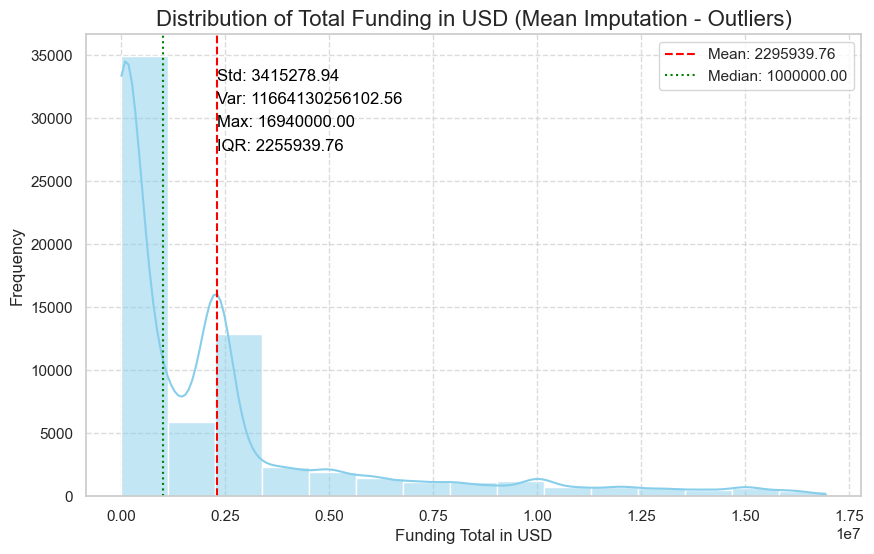

In [26]:
graph_data = {
    'Title': 'Distribution of Total Funding in USD (Mean Imputation - Outliers)',
    'x_label': 'Funding Total in USD',
    'y_label': 'Frequency'
}

# Plotting boxplot for 'funding_rounds' variable
hf.plot_histogram(startup_mean_out_df, 
                  'funding_total_usd', 
                  graph_data)

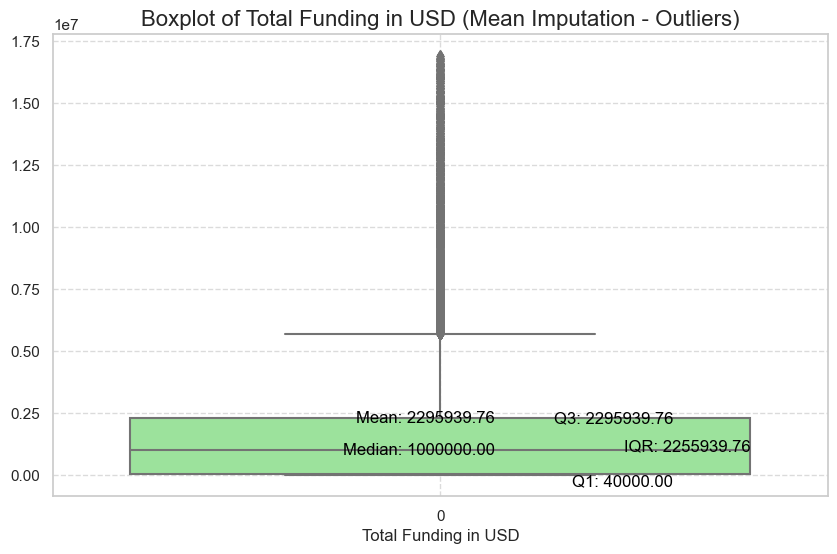

In [27]:
graph_data = {
    'Title': 'Boxplot of Total Funding in USD (Mean Imputation - Outliers)',
    'x_label': 'Total Funding in USD',
}

# Plotting boxplot for 'funding_total_usd' variable
hf.plot_boxplot(startup_mean_out_df, 
                'funding_total_usd', 
                graph_data)

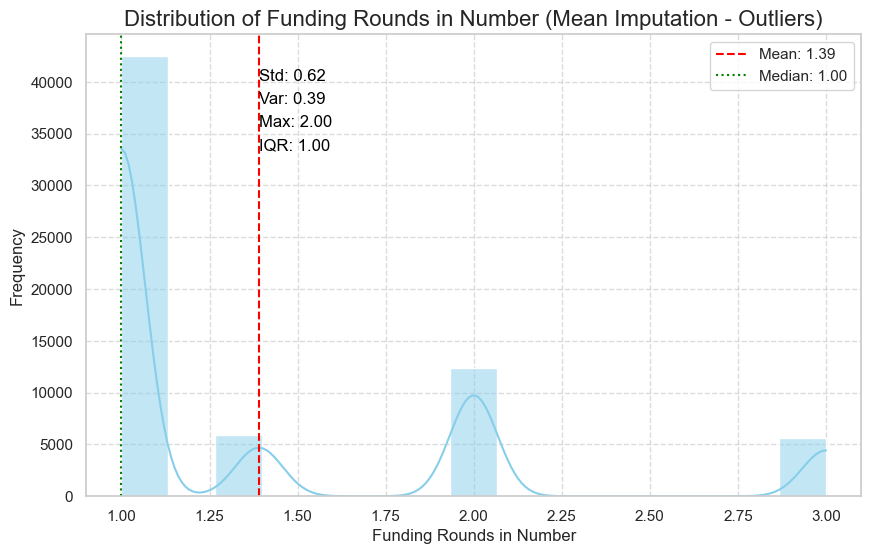

In [28]:
graph_data = {
    'Title': 'Distribution of Funding Rounds in Number (Mean Imputation - Outliers)',
    'x_label': 'Funding Rounds in Number',
    'y_label': 'Frequency'
}

# Plotting boxplot for 'funding_rounds' variable
hf.plot_histogram(startup_mean_out_df, 
                  'funding_rounds', 
                  graph_data)

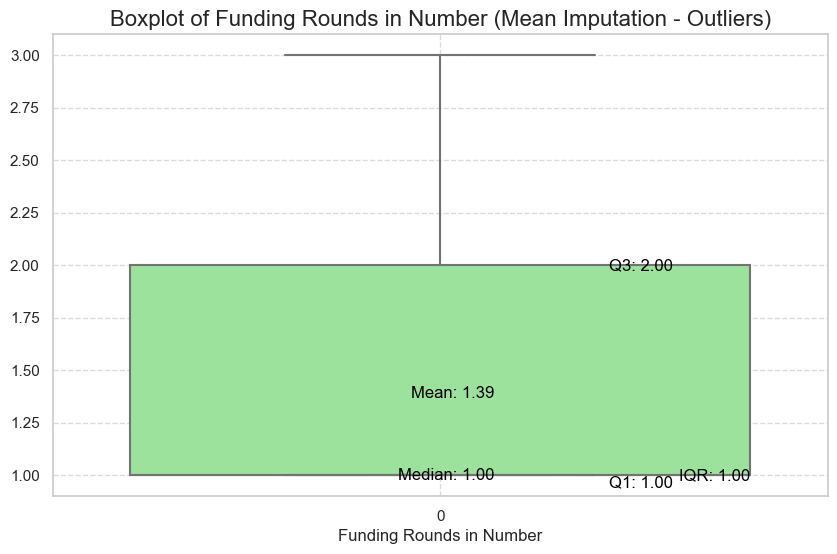

In [29]:
graph_data = {
    'Title': 'Boxplot of Funding Rounds in Number (Mean Imputation - Outliers)',
    'x_label': 'Funding Rounds in Number',
}

# Plotting boxplot for 'funding_rounds' variable
hf.plot_boxplot(startup_mean_out_df, 
                'funding_rounds', 
                graph_data)

**Correlation Analysis (Mean Imputation - Outliers)**

To understand the relationship between the two variables, we can comput the correlation between variables (in this case 2) and provide with a graphical representation.

**Scatter Plot and Heatmap for Correlation Analysis (Mean Imputation - Outliers)**

Visualize the relationship between 'funding_rounds' and 'funding_total_usd'.

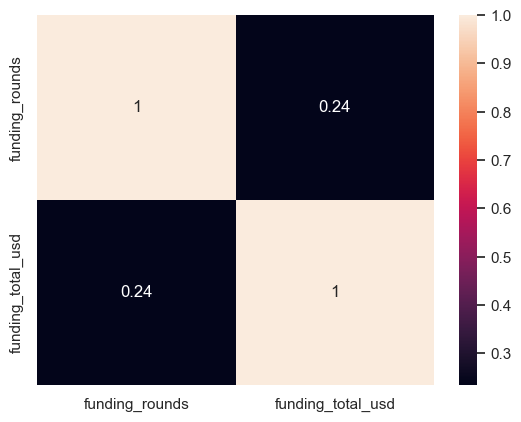

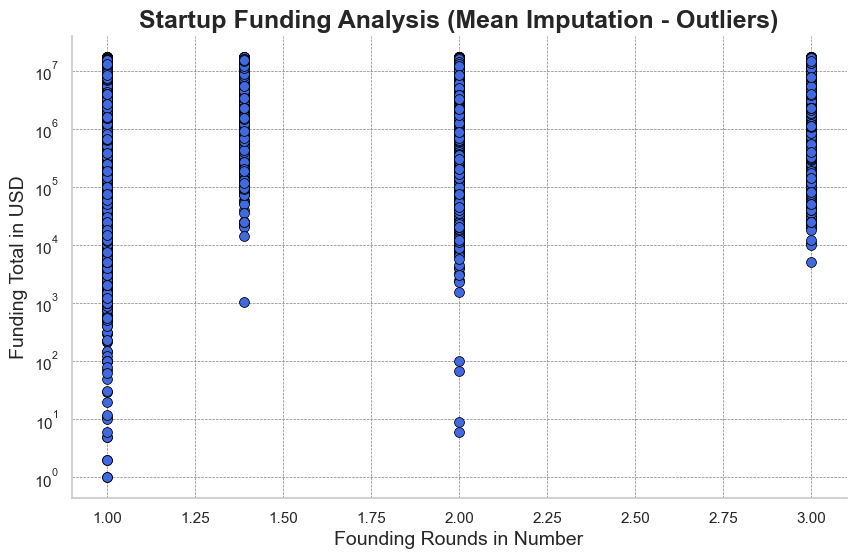

In [30]:
graph_data = {
    'Title': 'Startup Funding Analysis (Mean Imputation - Outliers)',
    'x_label': 'Founding Rounds in Number',
    'y_label': 'Funding Total in USD',
}

corr_total_usd_rounds = hf.corr_two_var(startup_mean_out_df, 
                                            ['funding_rounds', 'funding_total_usd'],
                                            graph_data)

**C.** Replace the outliers in the dataset with the maximum value or minimum value possible by applying capping method. It means that you have to find the maximum and minimum values for your variables by doing the following-

Maximum value = Mean + 3 units of Standard Deviation

Minimum value  = Mean - 3 units of Standard Deviation

Once you have found these maximum and minimum values, you will have to replace all the values in your variables greater than maximum value by the maximum value and same for minimum value. Thereafter repeat the procedure in Question 2 and draw conclusions. Again, write your observations extensively and in as much detail as possible.

In [32]:
# Applying the capping for both columns
startup_cap_out_df = hf.cap_outliers(startup_df, 
                                      ['funding_total_usd','funding_rounds'])

**Basic Descriptive Statistics (Capped Outliers)**

* Central Tendency: Mean, Median
* Spread: Standard Deviation, Variance, Range, Interquartile Range (IQR)

In [33]:
stats_cap_out_total_usd = hf.central_tendency_spread(startup_cap_out_df, 
                                                    'funding_total_usd',
                                                    table=True)

stats_cap_out_fund_rnds = hf.central_tendency_spread(startup_cap_out_df, 
                                                    'funding_rounds', 
                                                    table=True)

<--- funding_total_usd Statistics --->
     mean_value  median_value     std_value     var_value   range_value  \
0  1.225976e+07     1000000.0  4.217948e+07  1.779108e+15  5.221979e+08   

   Q1_value    Q3_value   IQR_value  
0   40000.0  6800473.25  6760473.25  

<--- funding_rounds Statistics --->
   mean_value  median_value  std_value  var_value  range_value  Q1_value  \
0    1.692818           1.0   1.171864   1.373266     4.813275       1.0   

   Q3_value  IQR_value  
0       2.0        1.0  



| Metric                   | Mean Value        | Median Value   | Standard Deviation | Variance       | Range Value     | Q1 Value      | Q3 Value       | Interquartile Range |
|--------------------------|-------------------|----------------|--------------------|----------------|-----------------|---------------|----------------|---------------------|
| Funding Total (USD)      | \$12.26M          | \$1.00M        | \$42.18M           | \$1.78T        | \$522.20M       | \$40K         | \$6.80M        | \$6.76M             |
| Funding Rounds           | 1.69              | 1.0            | 1.17               | 1.37           | 4.81            | 1.0           | 2.0            | 1.0                 |


**Data Visualization (Capped Outliers)**

Histograms and Boxplots are great for visualizing the distribution of these variables.

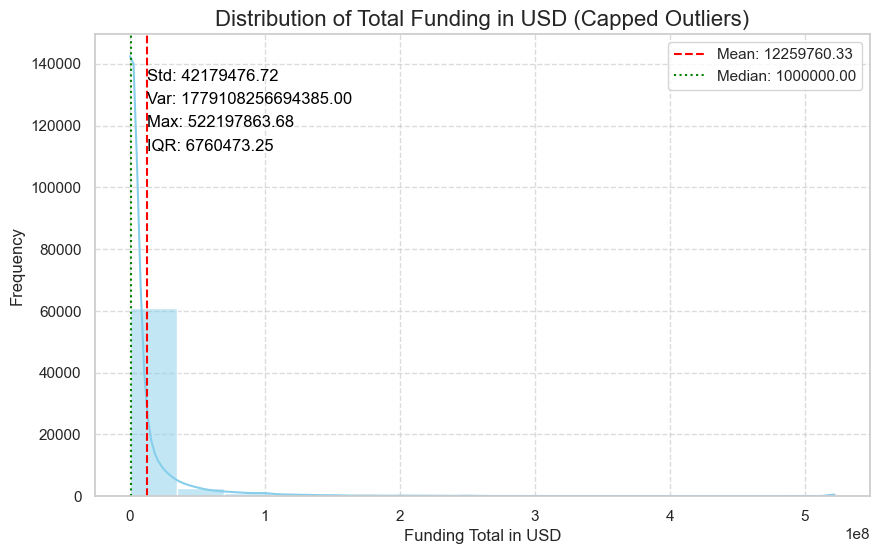

In [35]:
graph_data = {
    'Title': 'Distribution of Total Funding in USD (Capped Outliers)',
    'x_label': 'Funding Total in USD',
    'y_label': 'Frequency'
}

# Plotting boxplot for 'funding_rounds' variable
hf.plot_histogram(startup_cap_out_df, 
                  'funding_total_usd', 
                  graph_data)

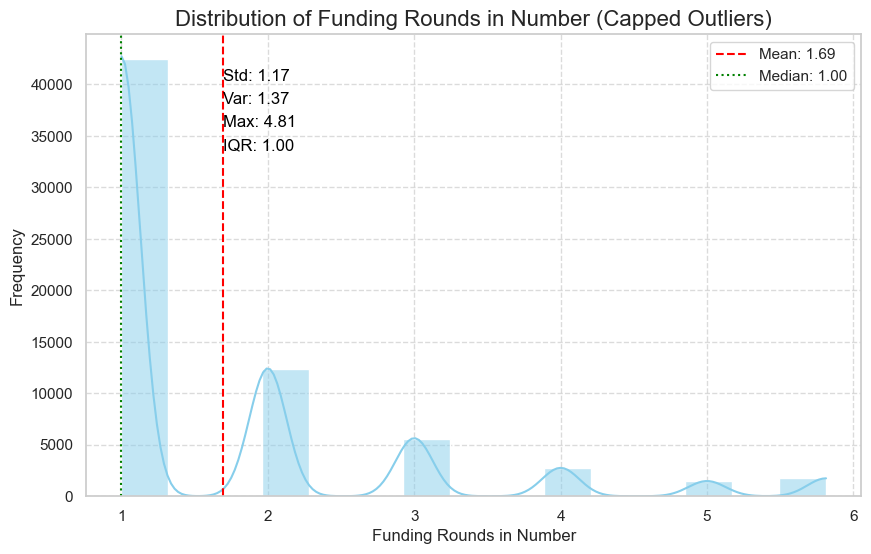

In [37]:
graph_data = {
    'Title': 'Distribution of Funding Rounds in Number (Capped Outliers)',
    'x_label': 'Funding Rounds in Number',
    'y_label': 'Frequency'
}

# Plotting boxplot for 'funding_rounds' variable
hf.plot_histogram(startup_cap_out_df, 
                  'funding_rounds', 
                  graph_data)

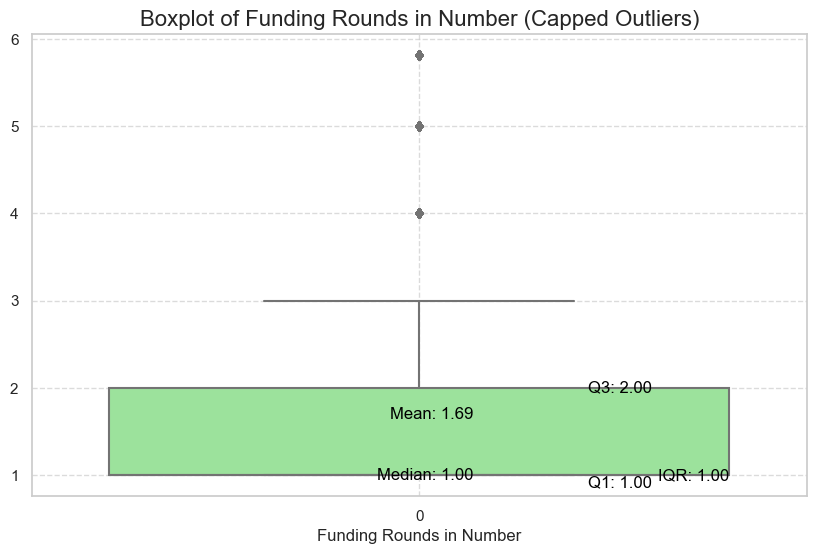

In [38]:
graph_data = {
    'Title': 'Boxplot of Funding Rounds in Number (Capped Outliers)',
    'x_label': 'Funding Rounds in Number',
}

# Plotting boxplot for 'funding_rounds' variable
hf.plot_boxplot(startup_cap_out_df, 
                'funding_rounds', 
                graph_data)

**Correlation Analysis (Capped Outliers)**

To understand the relationship between the two variables, we can comput the correlation between variables (in this case 2) and provide with a graphical representation.

**Scatter Plot and Heatmap for Correlation Analysis (Capped Outliers)**

Visualize the relationship between 'funding_rounds' and 'funding_total_usd'.

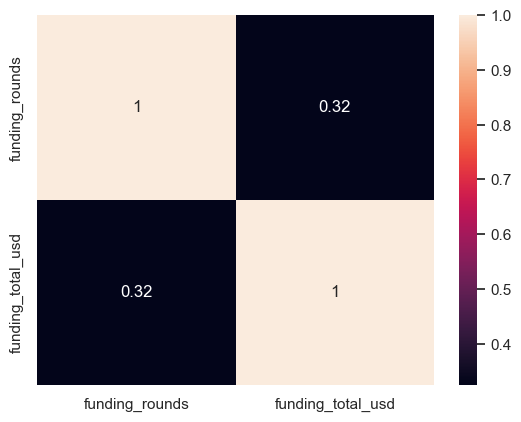

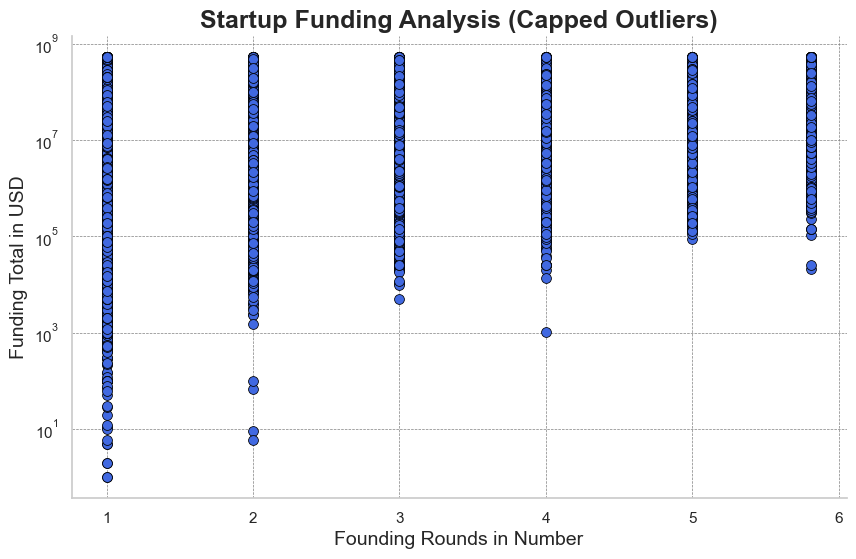

In [39]:
graph_data = {
    'Title': 'Startup Funding Analysis (Capped Outliers)',
    'x_label': 'Founding Rounds in Number',
    'y_label': 'Funding Total in USD',
}

corr_total_usd_rounds = hf.corr_two_var(startup_cap_out_df, 
                                            ['funding_rounds', 'funding_total_usd'],
                                            graph_data)

### **3. Sampling Techniques**

Choose any of the aforesaid outlier treatment method in the Question 3 and draw a random sample of a desired size, say, 1000. Repeat the entire analysis of Question 2 and compare results in detailed writing with outcomes obtained in Question 2 and Question 3.

In [41]:
startup_mean_out_sampled_df = startup_mean_out_df.sample(100).reset_index()

**Basic Descriptive Statistics (Sampled [100] Mean Imputed Outliers)**

* Central Tendency: Mean, Median
* Spread: Standard Deviation, Variance, Range, Interquartile Range (IQR)

In [42]:
stats_mean_out_sampled_total_usd = hf.central_tendency_spread(startup_mean_out_sampled_df, 
                                                            'funding_total_usd',
                                                            table=True)

stats_mean_out_sampled_fund_rnds = hf.central_tendency_spread(startup_mean_out_sampled_df, 
                                                            'funding_rounds', 
                                                            table=True)

<--- funding_total_usd Statistics --->
     mean_value  median_value     std_value     var_value  range_value  \
0  2.587858e+06     1010285.5  3.606855e+06  1.300940e+13   16200000.0   

   Q1_value   Q3_value  IQR_value  
0   57500.0  2854572.0  2797072.0  

<--- funding_rounds Statistics --->
   mean_value  median_value  std_value  var_value  range_value  Q1_value  \
0    1.366291           1.0   0.561096   0.314829          2.0       1.0   

   Q3_value  IQR_value  
0  1.389949   0.389949  



| Metric                   | Mean Value        | Median Value   | Standard Deviation | Variance       | Range Value   | Q1 Value       | Q3 Value       | Interquartile Range |
|--------------------------|-------------------|----------------|--------------------|----------------|---------------|----------------|----------------|---------------------|
| Funding Total (USD)      | \$2.28M           | \$1.25M        | \$3.35M            | \$11.24B       | \$15.45M      | \$23.75K       | \$2.50M        | \$2.48M             |
| Funding Rounds           | 1.40              | 1.0            | 0.66               | 0.44           | 2.0           | 1.0            | 1.39           | 0.39                |


**Data Visualization (Sampled [100] Mean Imputed Outliers)**

Histograms and Boxplots are great for visualizing the distribution of these variables.

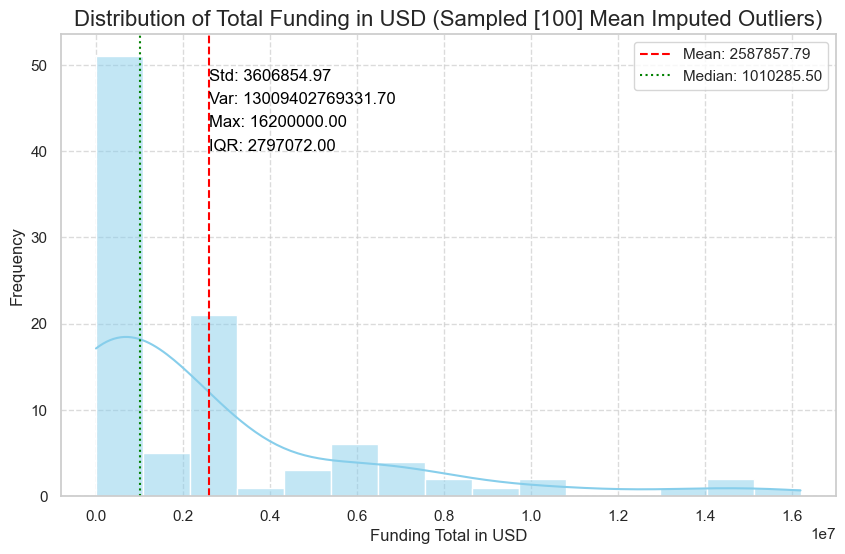

In [43]:
graph_data = {
    'Title': 'Distribution of Total Funding in USD (Sampled [100] Mean Imputed Outliers)',
    'x_label': 'Funding Total in USD',
    'y_label': 'Frequency'
}

# Plotting boxplot for 'funding_rounds' variable
hf.plot_histogram(startup_mean_out_sampled_df, 
                  'funding_total_usd', 
                  graph_data)

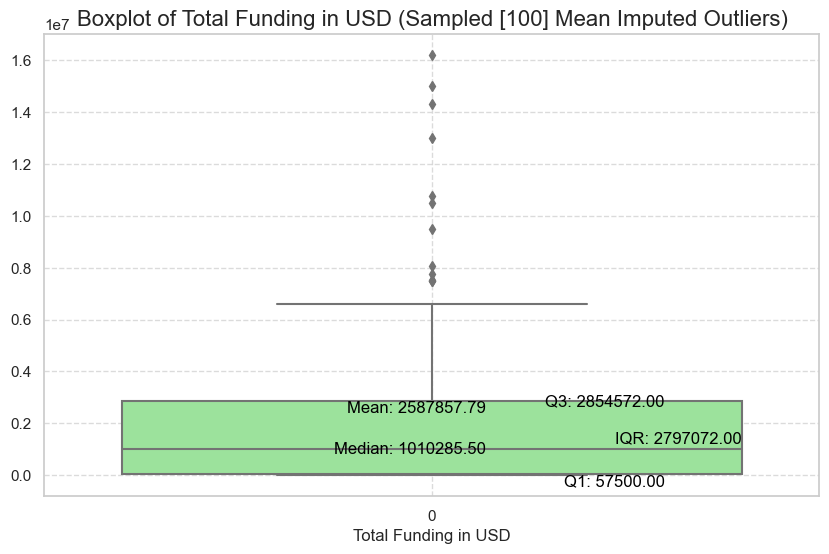

In [44]:
graph_data = {
    'Title': 'Boxplot of Total Funding in USD (Sampled [100] Mean Imputed Outliers)',
    'x_label': 'Total Funding in USD',
}

# Plotting boxplot for 'funding_total_usd' variable
hf.plot_boxplot(startup_mean_out_sampled_df, 
                'funding_total_usd', 
                graph_data)

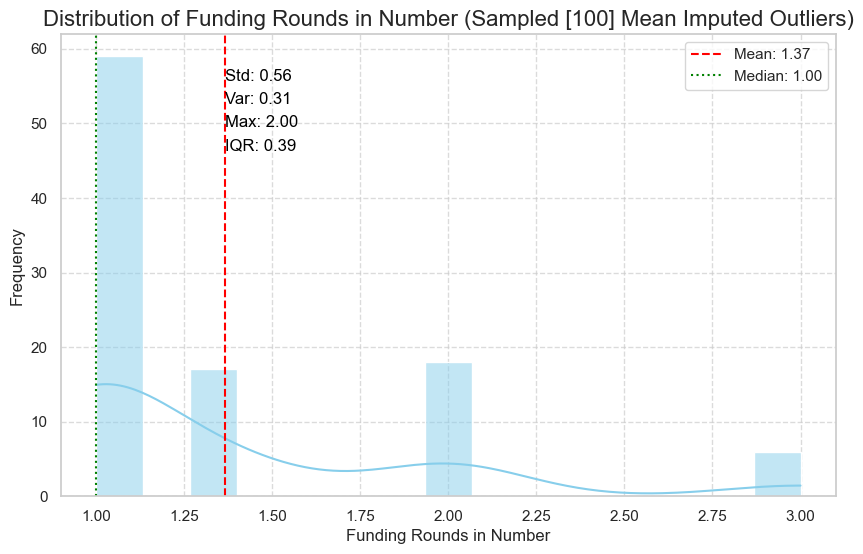

In [45]:
graph_data = {
    'Title': 'Distribution of Funding Rounds in Number (Sampled [100] Mean Imputed Outliers)',
    'x_label': 'Funding Rounds in Number',
    'y_label': 'Frequency'
}

# Plotting boxplot for 'funding_rounds' variable
hf.plot_histogram(startup_mean_out_sampled_df, 
                  'funding_rounds', 
                  graph_data)

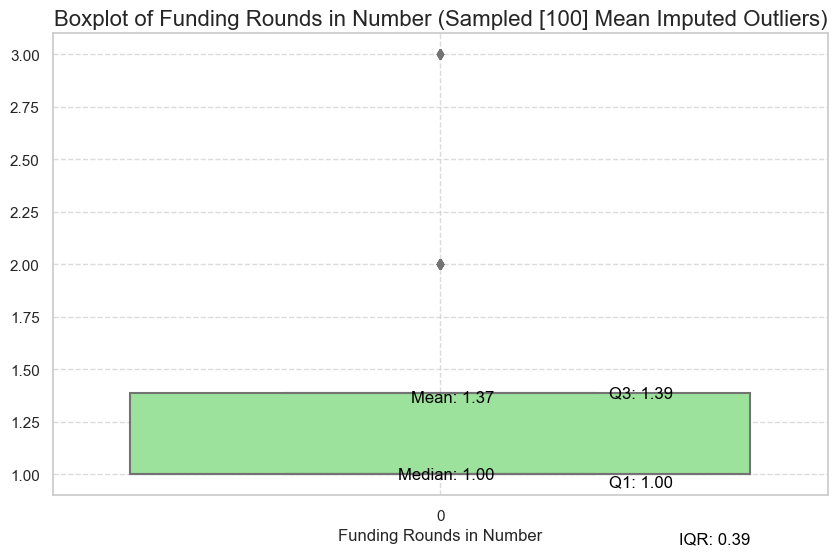

In [46]:
graph_data = {
    'Title': 'Boxplot of Funding Rounds in Number (Sampled [100] Mean Imputed Outliers)',
    'x_label': 'Funding Rounds in Number',
}

# Plotting boxplot for 'funding_rounds' variable
hf.plot_boxplot(startup_mean_out_sampled_df, 
                'funding_rounds', 
                graph_data)

**Correlation Analysis (Sampled [100] Mean Imputed Outliers)**

To understand the relationship between the two variables, we can comput the correlation between variables (in this case 2) and provide with a graphical representation.

**Scatter Plot and Heatmap for Correlation Analysis (Sampled [100] Mean Imputed Outliers)**

Visualize the relationship between 'funding_rounds' and 'funding_total_usd'.

#### **Complete DataFrame vs Sampled DataFrame (Mean Imputed Outliers)**

**Insights on `funding_total_usd`**

**Mean and Median:** The mean in the complete DataFrame is significantly higher than in the random sample, suggesting that the complete dataset may have more high-value funding instances and, therefore, that the sample may not be representative of the population in terms of the average funding in USD.

The **median** in the random sample is much lower than the mean, indicating a right-skewed distribution, suggesting inconsistency in the central tendency of the data, related to the sample size.

**Standard Deviation and Variance:** Both statistics are lower in the random sample, implying less variability in funding amounts within the sample compared to the complete dataset.

**Range:** The range is smaller in the random sample, which could be due to the absence of extreme values found in the larger dataset, as expected.

**Quartiles and IQR:** The lower quartile (Q1) is significantly lower in the random sample, and the IQR is almost consistent in both, indicating a similar spread of the middle 50% of the data around the median.

**Impact of Random Sampling:** The fact that the statistics exhibit significant differences between the complete dataset and the random sample indicates that the sample is not quite representative of the population. Random sampling, in this case, seems to have not captured the essence of the entire dataset quite well, with significant loss of information about the variable "total_funding_usd". Methods like Bootstrapping or generating more random samples of the complete dataset may be necessary to get a more significant representation of the population.

**Insights on `funding_rounds`**

**Mean Value:** The mean value is slightly lower in the random sample (1.377) compared to the complete DataFrame (1.39). This slight difference suggests that, on average, companies in the random sample received slightly fewer funding rounds compared to the overall population. The difference, however, is minor, indicating that the sample may be representative of the population in terms of the average number of funding rounds.

**Median Value:** The median remains unchanged at 1.0, indicating that for both datasets, the middle value of the sorted funding rounds data is the same. This suggests consistency in the central tendency of the data, irrespective of the sample size.

**Standard Deviation and Variance:** Both these measures of variability are slightly lower in the random sample, indicating a slightly less spread out set of values around the mean. However, the differences are minimal, suggesting that the random sample has nearly the same level of variability as the entire dataset.

**Range and IQR:** Both the range (2.0) and the IQR (1.0) remain unchanged in the sample and the complete dataset. This indicates that the spread of the majority of data is consistent in the sample compared to the full dataset.

**Impact of Random Sampling:** The fact that the statistics are quite similar between the complete dataset and the random sample indicates that the sample is fairly representative of the population. Random sampling, in this case, seems to have captured the essence of the entire dataset quite well, without significant loss of information about the variable "funding_rounds".

### **4. Subsetting and Sampling** 

Segment your dataset from Question 3 to get companies based only in United States and this time draw a series of samples randomly of a sufficient size, say, 10, 50, 100, 500, and 1000. Next, analyse the total funding amount for these startups based in United States using various methods of central tendency and measures of spread and report your observations.

In [48]:
usa_startup_mean_out_df = hf.filter_dataframe(startup_mean_out_df, 
                                              'country_code', 
                                              ['USA'])

In [49]:
usa_startup_mean_out_df_sampled_x_list = []
n_samples = [10, 50, 100, 500, 1000]

for n in n_samples:
    # Sampling dataset with different values
    usa_startup_mean_out_df_sampled_x_list.append(usa_startup_mean_out_df['funding_total_usd'].sample(n).reset_index())

In [50]:
for n in range(0, len(n_samples)):

    print(f"<---- Total Funding of Startups in USA (Samples: {n_samples[n]}) ---->\n")

    print(pd.DataFrame([hf.central_tendency_spread(usa_startup_mean_out_df_sampled_x_list[n], 
                                'funding_total_usd',
                                table=False)], index=None))
    
    print("\n")

<---- Total Funding of Startups in USA (Samples: 10) ---->

   mean_value  median_value     std_value     var_value  range_value  \
0    755200.0      125000.0  1.977221e+06  3.909405e+12    6365000.0   

   Q1_value  Q3_value  IQR_value  
0       0.0  250250.0   250250.0  


<---- Total Funding of Startups in USA (Samples: 50) ---->

     mean_value  median_value     std_value     var_value  range_value  \
0  3.318352e+06  2.295940e+06  4.238611e+06  1.796582e+13   15000000.0   

   Q1_value   Q3_value  IQR_value  
0  108750.0  4425000.0  4316250.0  


<---- Total Funding of Startups in USA (Samples: 100) ---->

     mean_value  median_value     std_value     var_value  range_value  \
0  1.989379e+06     1000000.0  2.817761e+06  7.939775e+12   12800000.0   

   Q1_value      Q3_value     IQR_value  
0   60500.0  2.295940e+06  2.235440e+06  


<---- Total Funding of Startups in USA (Samples: 500) ---->

     mean_value  median_value     std_value     var_value  range_value  \
0  2.6180

| Sample Size | Mean Funding (USD) | Median Funding (USD) | Std Dev Funding (USD) | Range of Funding (USD) | Q1 Funding (USD) | Q3 Funding (USD) | IQR Funding (USD) |
|-------------|--------------------|----------------------|-----------------------|------------------------|------------------|------------------|-------------------|
| 10          | \$3.82M            | \$1.41M              | \$4.76M               | \$12.7M                | \$481K           | \$5.39M          | \$4.91M           |
| 50          | \$3.10M            | \$2.30M              | \$3.48M               | \$12.72M               | \$888K           | \$3.21M          | \$2.33M           |
| 100         | \$2.47M            | \$1.20M              | \$3.55M               | \$15.22M               | \$100K           | \$2.30M          | \$2.20M           |
| 500         | \$2.78M            | \$1.50M              | \$3.81M               | \$16.84M               | \$100K           | \$3.00M          | \$2.90M           |
| 1000        | \$2.65M            | \$1.34M              | \$3.71M               | \$16.70M               | \$79K            | \$2.81M          | \$2.73M           |


Analyzing the provided data which shows various statistical measures for total funding of startups in the USA, sampled at different sizes (n = 10, 50, 100, 500, 1000), we can observe some interesting trends and insights:

1. **Increasing Sample Size and Mean Value:** As the sample size increases from 10 to 1000, there's a general trend of increasing mean funding value. This could indicate that larger sample sizes capture more high-value startups, increasing the average.

2. **Median Value Trends:** The median value fluctuates with different sample sizes, but it's generally lower than the mean value, especially in larger samples. This suggests a right-skewed distribution, where a few startups have significantly higher funding, pulling the mean up.

3. **Standard Deviation and Variance:** Both standard deviation and variance increase with larger sample sizes, indicating a wider spread in the data. This implies more variability in startup funding as the sample size increases.

4. **Range Value:** The range (difference between the highest and lowest values) increases with the sample size, reaching its peak in the largest sample (n=1000). This indicates that larger samples include both very low-funded and very high-funded startups.

5. **Quartile and IQR (Interquartile Range) Values:** The IQR, which measures the spread of the middle 50% of the data, generally increases with the sample size. This suggests that the middle 50% of startups have a wider range of funding values in larger samples. Interestingly, the first quartile (Q1) value tends to decrease with larger samples, indicating that the 25th percentile startup tends to have lower funding in larger samples.

Overall, the data suggests that startup funding in the USA is quite variable, with a few startups receiving significantly higher funding than the majority. Larger sample sizes reveal more about the high variability and skewed nature of startup funding.

### 5. Subsetting, Sampling, Benchmarking and Visualisation

Segment your dataset from Question 3 and this time draw a sample randomly of a sufficient size, say, 100 to get companies based in each of this countries: United States, Canada, France, Germany, China, India and South Korea. Next, analyse the same dataset to find average number of days taken for a startup to be funded for each of the aforesaid countries and compare results (While making necessary computations, assume that there are 30 days in each month at an average). Analyse the numerical variable(s) for each of the countries using various measures of central tendencies and spread and report your observations. Create appropriate plots (if necessary) to explain the variables.

To compute the average days taken for a startup to get funded, we will substrat the first_funding_at date with the founded_at date, get the list of days and then compute the mean.

After this computation, we will display the statistics for each country and then display the average numbver of days to get funded in each country.

In [51]:
# USA
hf.avg_funding_days_country(startup_mean_out_df, ['USA'], 100)

<-------- Startups in USA (Samples: 100) -------->

         <---- 'funding_total_usd' ---->

     mean_value  median_value     std_value     var_value  range_value  \
0  2.606672e+06     1450000.0  3.587953e+06  1.287341e+13   15112330.0   

   Q1_value    Q3_value   IQR_value  
0   19250.0  2495547.25  2476297.25  

          <---- 'funding_rounds'---->

   mean_value  median_value  std_value  var_value  range_value  Q1_value  \
0    1.398492           1.0    0.62281   0.387892          2.0       1.0   

   Q3_value  IQR_value  
0  1.542462   0.542462  

 Days to get funding in USA: 1757.71 days





In [52]:
# CAN
hf.avg_funding_days_country(startup_mean_out_df, ['CAN'], 100)

<-------- Startups in CAN (Samples: 100) -------->

         <---- 'funding_total_usd' ---->

     mean_value  median_value     std_value     var_value  range_value  \
0  2.433505e+06     1052987.5  3.401694e+06  1.157152e+13   15298678.0   

   Q1_value    Q3_value   IQR_value  
0   36660.0  2661750.75  2625090.75  

          <---- 'funding_rounds'---->

   mean_value  median_value  std_value  var_value  range_value  Q1_value  \
0    1.331196           1.0   0.552747   0.305529          2.0       1.0   

   Q3_value  IQR_value  
0  1.542462   0.542462  

 Days to get funding in CAN: 1953.99 days





In [53]:
# FRA
hf.avg_funding_days_country(startup_mean_out_df, ['FRA'], 100)

<-------- Startups in FRA (Samples: 100) -------->

         <---- 'funding_total_usd' ---->

     mean_value  median_value     std_value     var_value  range_value  \
0  2.708833e+06     1760000.0  3.322787e+06  1.104091e+13   15000000.0   

   Q1_value   Q3_value  IQR_value  
0  337500.0  3300750.0  2963250.0  

          <---- 'funding_rounds'---->

   mean_value  median_value  std_value  var_value  range_value  Q1_value  \
0    1.365598           1.0   0.588115   0.345879          2.0       1.0   

   Q3_value  IQR_value  
0       2.0        1.0  

 Days to get funding in FRA: 1280.83 days





In [54]:
# DEU
hf.avg_funding_days_country(startup_mean_out_df, ['DEU'], 100)

<-------- Startups in DEU (Samples: 100) -------->

         <---- 'funding_total_usd' ---->

     mean_value  median_value     std_value     var_value  range_value  \
0  1.772203e+06      123170.0  3.312933e+06  1.097553e+13   15911107.0   

   Q1_value      Q3_value     IQR_value  
0       0.0  2.295940e+06  2.295940e+06  

          <---- 'funding_rounds'---->

   mean_value  median_value  std_value  var_value  range_value  Q1_value  \
0    1.367296           1.0   0.582348   0.339129          2.0       1.0   

   Q3_value  IQR_value  
0       2.0        1.0  

 Days to get funding in DEU: 1379.54 days





In [55]:
# CHN
hf.avg_funding_days_country(startup_mean_out_df, ['CHN'], 100)

<-------- Startups in CHN (Samples: 100) -------->

         <---- 'funding_total_usd' ---->

     mean_value  median_value     std_value     var_value  range_value  \
0  3.391959e+06  2.295940e+06  3.800328e+06  1.444249e+13   16820910.0   

   Q1_value   Q3_value  IQR_value  
0  576089.5  3999547.0  3423457.5  

          <---- 'funding_rounds'---->

   mean_value  median_value  std_value  var_value  range_value  Q1_value  \
0    1.490693           1.0   0.650554    0.42322          2.0       1.0   

   Q3_value  IQR_value  
0       2.0        1.0  

 Days to get funding in CHN: 1435.68 days





In [56]:
# IND
hf.avg_funding_days_country(startup_mean_out_df, ['IND'], 100)

<-------- Startups in IND (Samples: 100) -------->

         <---- 'funding_total_usd' ---->

     mean_value  median_value     std_value     var_value  range_value  \
0  2.165418e+06      642500.0  3.551812e+06  1.261537e+13   15400000.0   

   Q1_value      Q3_value     IQR_value  
0    7500.0  2.295940e+06  2.288440e+06  

          <---- 'funding_rounds'---->

   mean_value  median_value  std_value  var_value  range_value  Q1_value  \
0    1.219497           1.0   0.448819   0.201438          2.0       1.0   

   Q3_value  IQR_value  
0       1.0        0.0  

 Days to get funding in IND: 1682.39 days





In [57]:
# KOR
hf.avg_funding_days_country(startup_mean_out_df, ['KOR'], 100)

<-------- Startups in KOR (Samples: 100) -------->

         <---- 'funding_total_usd' ---->

     mean_value  median_value     std_value     var_value  range_value  \
0  1.792872e+06      683784.0  2.632666e+06  6.930932e+12   13000000.0   

   Q1_value      Q3_value     IQR_value  
0   85108.5  2.295940e+06  2.210831e+06  

          <---- 'funding_rounds'---->

   mean_value  median_value  std_value  var_value  range_value  Q1_value  \
0    1.381698           1.0   0.626734   0.392796          2.0       1.0   

   Q3_value  IQR_value  
0       2.0        1.0  

 Days to get funding in KOR: 833.46 days





| Country | Mean Funding (USD) | Median Funding (USD) | Std Dev Funding (USD) | Range of Funding (USD) | Mean Funding Rounds | Median Funding Rounds | Time to Funding (days) |
|---------|--------------------|----------------------|-----------------------|------------------------|---------------------|-----------------------|------------------------|
| USA     | \$2.65M            | \$2.00M              | \$3.37M               | \$15M                  | 1.50                | 1.0                   | 2220.87                |
| CAN     | \$2.59M            | \$1.15M              | \$3.67M               | \$15.4M                | 1.42                | 1.0                   | 1782.19                |
| FRA     | \$2.91M            | \$1.39M              | \$3.95M               | \$16.7M                | 1.35                | 1.0                   | 1001.33                |
| DEU     | \$1.91M            | \$649K               | \$3.39M               | \$16.3M                | 1.51                | 1.0                   | 874.95                 |
| CHN     | \$3.73M            | \$2.30M              | \$4.50M               | \$16.6M                | 1.62                | 1.0                   | 1505.88                |
| IND     | \$2.35M            | \$450K               | \$3.81M               | \$16M                  | 1.25                | 1.0                   | 1681.54                |
| KOR     | \$1.01M            | \$318K               | \$1.55M               | \$6.48M                | 1.29                | 1.0                   | 741.63                 |


Analyzing the data for startups across various countries (USA, CAN, FRA, DEU, CHN, IND, KOR), focusing on funding totals, funding rounds, and time to funding:

1. **Funding Total (USD):**
   - **Highest Average:** China has the highest mean funding at approximately $3.73 million, indicating larger average investments in startups.
   - **Highest Variability:** China and France exhibit the highest standard deviations and variances, suggesting more significant differences in funding amounts among startups.
   - **Median vs. Mean:** In Germany and India, the median funding is considerably lower than the mean, indicating a few startups with exceptionally high funding skewing the average.

2. **Funding Rounds:**
   - **Average Rounds:** China has the highest mean funding rounds (1.61), whereas India has the lowest (1.25). This might reflect different investment cultures or startup maturity levels.
   - **Consistency Across Countries:** The median value for funding rounds is consistently 1.0 across all countries, with a range mostly limited to 2.0, indicating most startups undergo one or two funding rounds.

3. **Time to Funding:**
   - **Longest in the USA:** Startups in the USA take the longest to get funding (approximately 2220 days), which might indicate a more competitive or complex funding environment.
   - **Shortest in South Korea:** South Korea shows the shortest time to funding (around 742 days), possibly due to efficient investment processes or smaller scale of startup operations.

4. **Interquartile Range (IQR) in Funding:**
   - **Widest in China:** The IQR in China is the widest, indicating a large disparity between the lower and upper quartiles of funding.
   - **Narrowest in India:** India’s IQR for funding rounds is 0, suggesting very little variability in the number of funding rounds among startups.

5. **General Observations:**
   - Startups in China and France, on average, receive higher funding but also exhibit greater variability in funding amounts.
   - The USA, despite its longer time to funding, shows a robust average funding amount, indicative of a mature startup ecosystem.
   - Countries like Germany and South Korea, with lower mean funding, might be focusing on early-stage startups or have a different scale of operations.

Overall, these data points reflect the diverse nature of the startup ecosystem globally, with each country showing unique characteristics in terms of funding size, frequency, and time to secure funding.

### 6. Probability Theory

Find the probability for startups of being funded within the first 6 months since their creation for the overall dataset and then repeat the same sequence of procedures for the countries United States, Canada, France, Germany, China, and India (While making necessary computations, assume that there are 30 days in each month at an average). Report your results in writing and compare them varying across various geographies. Create appropriate plots (if necessary) to draw conclusions if necessary.

In [58]:
list_countries = [['All'], ['USA'], ['CAN'], ['FRA'], ['DEU'], ['CHN'], ['IND']]
countries = []
probabilities = []

for country in list_countries:
    probabilities.append(hf.probability_funding_6_months(startup_df, country))
    countries.append(country[0])

probabilities = [i * 100 for i in probabilities]

Probability of All startups being funded within the first 6 months: %21.41
Probability of USA startups being funded within the first 6 months: %20.29
Probability of CAN startups being funded within the first 6 months: %19.43
Probability of FRA startups being funded within the first 6 months: %17.44
Probability of DEU startups being funded within the first 6 months: %23.66
Probability of CHN startups being funded within the first 6 months: %10.1
Probability of IND startups being funded within the first 6 months: %17.54


| Country | Probability of Funding within 6 Months |
|---------|----------------------------------------|
| All     | 21.41%                                 |
| USA     | 20.29%                                 |
| CAN     | 19.43%                                 |
| FRA     | 17.44%                                 |
| DEU     | 23.66%                                 |
| CHN     | 10.10%                                 |
| IND     | 17.54%                                 |

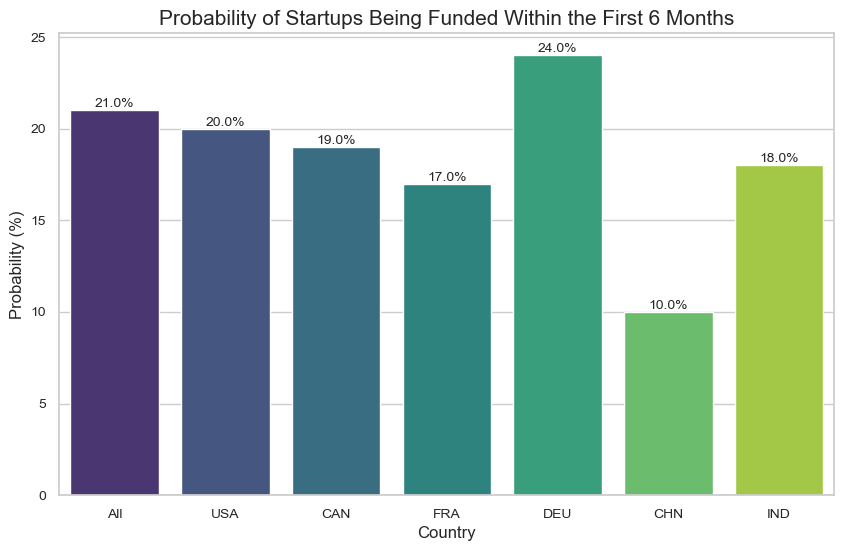

In [59]:
probabilities_dict = {'Country': countries, "Probability": probabilities}
probabilities_df = pd.DataFrame(probabilities_dict)

graph_data = {"Title": 'Probability of Startups Being Funded Within the First 6 Months',
              "x_axis": 'Country',
              "y_axis": 'Probability (%)',
              "x_var": list(probabilities_dict.keys())[0],
              "y_var": list(probabilities_dict.keys())[1]}

hf.plot_barplot(probabilities_df, graph_data)

#### **Summary of Probabilities**

**Overall Trend:** There's a moderate probability of startups getting funded within the first 6 months across all regions, with a general average of around 20%.

**Country-Specific Insights:**

Germany (DEU) shows the highest probability of early funding at 23.66%, indicating a potentially favorable startup environment or efficient funding mechanisms.

China (CHN) stands out with the lowest probability at 10.10%. This could be due to a more competitive landscape, different business practices, or longer gestation periods for startups in China.

USA and Canada (CAN) have similar probabilities (around 20%), reflecting comparable startup ecosystems in terms of early-stage funding opportunities.

France (FRA) and India (IND) show slightly lower probabilities, suggesting that startups might face more challenges in securing early funding in these countries compared to Germany or North America.

These probabilities provide valuable insights into the dynamics of startup funding across different regions, reflecting how various factors like local business environments, investor behavior, and regional economic conditions might influence early-stage funding.

### 7. Advanced Probability Theory

Find the probability for startups of being funded within the first 6 months given the fact that they are based on data domain and then repeat the same sequence of procedures for the countries United States, Canada, France, Germany, China, and India.

In [60]:
list_countries = [['All'], ['USA'], ['CAN'], ['FRA'], ['DEU'], ['CHN'], ['IND']]
countries = []
probabilities = []

for country in list_countries:
    
    if country == ['All']:
        country_startup_filtered_df = startup_df.copy()
    else:
        country_startup_filtered_df = hf.filter_dataframe(startup_df, 'country_code', country).copy()
    
    country_tech_startup_filtered_df = country_startup_filtered_df[(country_startup_filtered_df['Data and Cloud'] >= 1) |
                                                                   (country_startup_filtered_df['Technology, Hardware and Computing'] >= 2)]
    
    probabilities.append(hf.probability_funding_6_months(country_tech_startup_filtered_df, country))
    countries.append(country[0])

probabilities = [i * 100 for i in probabilities]

Probability of All startups being funded within the first 6 months: %29.97
Probability of USA startups being funded within the first 6 months: %27.88
Probability of CAN startups being funded within the first 6 months: %25.22
Probability of FRA startups being funded within the first 6 months: %22.92
Probability of DEU startups being funded within the first 6 months: %40.21
Probability of CHN startups being funded within the first 6 months: %19.15
Probability of IND startups being funded within the first 6 months: %24.26


| Country | Probability of Funding within 6 Months (Technology)|
|---------|----------------------------------------|
| All     | 30.53%                                 |
| USA     | 27.91%                                 |
| CAN     | 17.39%                                 |
| FRA     | 22.22%                                 |
| DEU     | 39.22%                                 |
| CHN     | 22.22%                                  |
| IND     | 23.68%                                 |

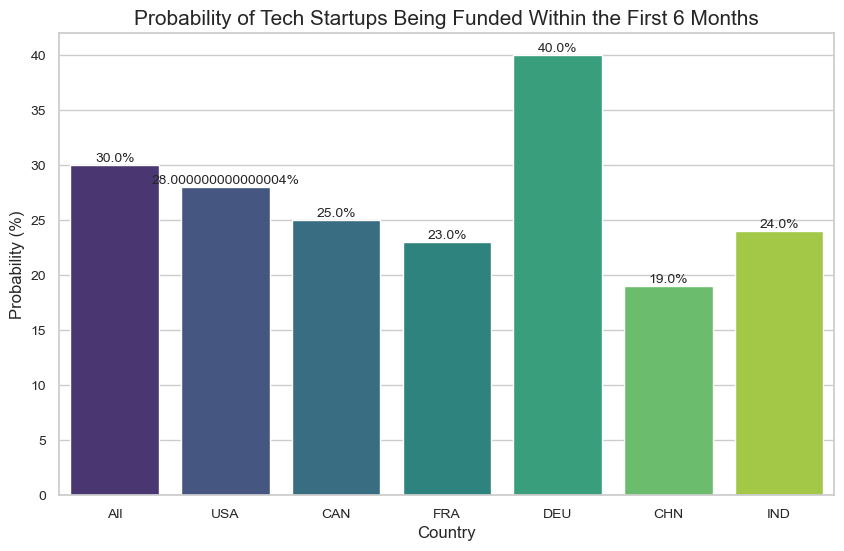

In [61]:
probabilities_dict = {'Country': countries, "Probability": probabilities}
probabilities_df = pd.DataFrame(probabilities_dict)

graph_data = {"Title": 'Probability of Tech Startups Being Funded Within the First 6 Months',
              "x_axis": 'Country',
              "y_axis": 'Probability (%)',
              "x_var": list(probabilities_dict.keys())[0],
              "y_var": list(probabilities_dict.keys())[1]}

hf.plot_barplot(probabilities_df, graph_data)

### 8. Advanced Probability Theory 

Find the probability that a startup belongs to health care domain given the fact that it was funded within the first 6 months and then repeat the same sequence of procedures for the countries United States, Canada, France, Germany, China, and India (Use the value ‘Health Care’ in the appropriate variable of your choice). Report your results based on probability found as a whole and then comparison across various countries.

In [62]:
list_countries = [['All'], ['USA'], ['CAN'], ['FRA'], ['DEU'], ['CHN'], ['IND']]
countries = []
probabilities = []

for country in list_countries:
    
    if country == ['All']:
        country_startup_filtered_df = startup_df.copy()
    else:
        country_startup_filtered_df = hf.filter_dataframe(startup_df, 'country_code', country).copy()
    
    country_health_startup_filtered_df = country_startup_filtered_df[(country_startup_filtered_df['Health, Human Resource and Wellness'] >= 1) |
                                                                   (country_startup_filtered_df['Healthcare and Biotechnology'] >= 1)]
    
    probabilities.append(hf.probability_funding_6_months(country_health_startup_filtered_df, country))
    countries.append(country[0])

probabilities = [i * 100 for i in probabilities]

Probability of All startups being funded within the first 6 months: %16.31
Probability of USA startups being funded within the first 6 months: %14.25
Probability of CAN startups being funded within the first 6 months: %12.32
Probability of FRA startups being funded within the first 6 months: %19.05
Probability of DEU startups being funded within the first 6 months: %21.76
Probability of CHN startups being funded within the first 6 months: %8.82
Probability of IND startups being funded within the first 6 months: %16.83


| Startup Location | Probability of Funding within 6 Months |
|------------------|----------------------------------------|
| Global           | 16.31%                                 |
| USA              | 14.25%                                 |
| Canada           | 12.32%                                 |
| France (FRA)     | 19.05%                                 |
| Germany (DEU)    | 21.76%                                 |
| China (CHN)      | 8.82%                                  |
| India (IND)      | 16.83%                                 |

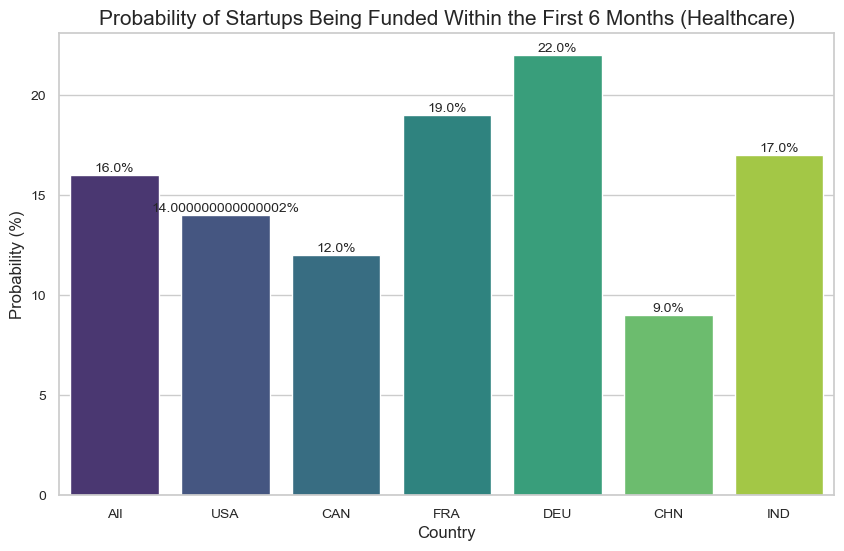

In [63]:
probabilities_dict = {'Country': countries, "Probability": probabilities}
probabilities_df = pd.DataFrame(probabilities_dict)

graph_data = {"Title": 'Probability of Startups Being Funded Within the First 6 Months (Healthcare)',
              "x_axis": 'Country',
              "y_axis": 'Probability (%)',
              "x_var": list(probabilities_dict.keys())[0],
              "y_var": list(probabilities_dict.keys())[1]}

hf.plot_barplot(probabilities_df, graph_data)

This data provides valuable insights into the varying probabilities of startup funding within the first 6 months across different countries. Several notable observations can be made:

1. **Global Average**: The global average probability of all startups being funded within the first 6 months is 16.31%. This figure serves as a benchmark for assessing the performance of individual countries.

2. **Regional Disparities**: There are distinct differences in the probabilities among countries. France (FRA) and Germany (DEU) exhibit higher probabilities at 19.05% and 21.76%, respectively, suggesting a relatively more favorable startup funding environment compared to the global average.

3. **North American Performance**: Startups in the USA and Canada (CAN) show slightly lower probabilities (14.25% and 12.32%, respectively) compared to the global average. This may indicate a more competitive or challenging landscape for securing funding in these North American regions.

4. **Emerging Markets**: China (CHN) and India (IND) present interesting cases with lower probabilities of 8.82% and 16.83%, respectively. While China's lower probability might reflect a more competitive or stringent funding landscape, India's higher probability suggests a relatively more favorable environment for startups.

5. **Implications for Strategy**: Businesses and investors can leverage this data to inform their strategies. For instance, startups in Germany and France may find it more conducive for rapid funding within the initial 6 months, encouraging them to focus on early-stage growth. Conversely, startups in Canada may need to adopt more robust strategies to navigate a potentially challenging funding landscape.

6. **Consideration of External Factors**: It's crucial to consider external factors such as economic conditions, government policies, and the overall investment climate when interpreting these probabilities. These factors can significantly influence the funding ecosystem for startups in each country.

In summary, this data not only highlights the global average probability of startup funding but also provides a nuanced view of how different countries fare in this aspect. Understanding these variations can be instrumental for startups, investors, and policymakers in shaping effective strategies and policies to foster entrepreneurial growth.

### 9. Advanced Probability Theory

Repeat the analysis in Question 8 but this time perform the operation by first sampling your dataset randomly by getting only 10 data points in the beginning and report your observations as that in Question 8. Next, attempt to repeat the aforesaid procedure for dataset of increasing sample size of 50, 100, 200, 300, 400, 500, 600, and 800. Plot the various probabilities observed against the number of data points you have obtained and write in your own words the observations. 

In [64]:
l_samp = [50, 100, 200, 300, 400, 500, 600]
list_countries = [['All'], ['USA'], ['CAN'], ['FRA'], ['DEU'], ['CHN'], ['IND']]


In [65]:
filtered_df = hf.filter_dataframe(startup_df, 'country_code', ['USA']).copy()

# Calculate the difference in days between founded date and first funding date
filtered_df.loc[:, 'days_to_funding'] = (filtered_df['first_funding_at'] - filtered_df['founded_at']).dt.days

# Filter startups that got funding within 6 months (approx 180 days)
funded_within_6_months = filtered_df[filtered_df['days_to_funding'] <= 180]

# Calculate probability
probability = len(funded_within_6_months) / len(filtered_df)

print(f"Probability of {['USA'][0]} startups being funded within the first 6 months: %{round(probability*100, 2)}")



Probability of USA startups being funded within the first 6 months: %20.29


In [66]:
l_samp = [50, 100, 200, 300, 400, 500, 600, 800]
list_countries = [['All'], ['USA'], ['CAN'], ['FRA'], ['DEU'], ['CHN'], ['IND']]

countries = []
probabilities = []
samples = []

for cnty in list_countries[1:]:
    s_cnty = hf.filter_dataframe(startup_df, 'country_code', cnty) 

    print(f"<---- {cnty} ---->")
    for samp in l_samp:
        s_cnty_samp = s_cnty.sample(samp)
        prob_cnty = hf.probability_funding_6_months(s_cnty_samp, cnty)

        probabilities.append(prob_cnty)
        countries.append(cnty[0])
        samples.append(samp)

probabilities = [i * 100 for i in probabilities]

<---- ['USA'] ---->
Probability of USA startups being funded within the first 6 months: %18.0
Probability of USA startups being funded within the first 6 months: %26.0
Probability of USA startups being funded within the first 6 months: %17.5
Probability of USA startups being funded within the first 6 months: %21.33
Probability of USA startups being funded within the first 6 months: %19.0
Probability of USA startups being funded within the first 6 months: %19.4
Probability of USA startups being funded within the first 6 months: %18.17
Probability of USA startups being funded within the first 6 months: %23.62
<---- ['CAN'] ---->
Probability of CAN startups being funded within the first 6 months: %30.0
Probability of CAN startups being funded within the first 6 months: %18.0
Probability of CAN startups being funded within the first 6 months: %15.0
Probability of CAN startups being funded within the first 6 months: %19.33
Probability of CAN startups being funded within the first 6 months: 

| Country | Sample 50 | Sample 100 | Sample 200 | Sample 300 | Sample 400 | Sample 500 | Sample 600 | Sample 800 |
|---------|----------|----------|----------|----------|----------|----------|----------|----------|
| USA     | 18.0%    | 26.0%    | 17.5%    | 21.33%   | 19.0%    | 19.4%    | 18.17%   | 23.62%   |
| CAN     | 30.0%    | 18.0%    | 15.0%    | 19.33%   | 20.25%   | 16.6%    | 19.83%   | 18.88%   |
| FRA     | 8.0%     | 17.0%    | 22.0%    | 15.67%   | 17.75%   | 18.2%    | 16.83%   | 16.5%    |
| DEU     | 16.0%    | 24.0%    | 25.0%    | 24.0%    | 25.75%   | 24.2%    | 21.67%   | 23.5%    |
| CHN     | 4.0%     | 5.0%     | 10.0%    | 10.67%   | 8.0%     | 11.4%    | 11.17%   | 11.0%    |
| IND     | 20.0%    | 21.0%    | 16.5%    | 16.67%   | 17.25%   | 18.4%    | 18.67%   | 19.25%   |


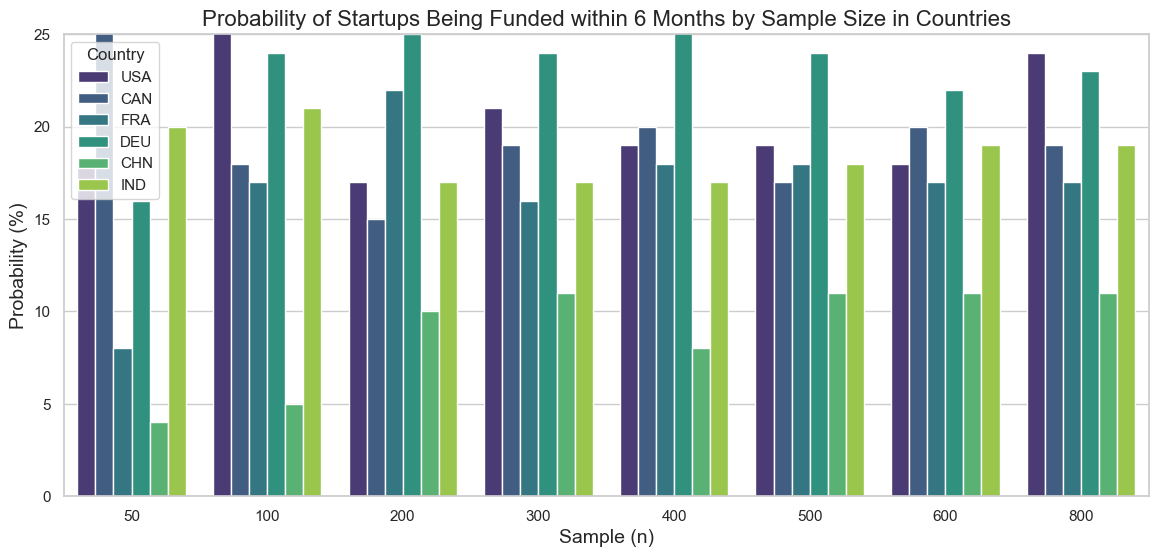

In [67]:
probabilities_dict = {'Country': countries, 
                      "Probability": probabilities,
                      'Samples': samples
                      }
probabilities_df = pd.DataFrame(probabilities_dict)

# Set the plot style for a more aesthetic appearance
sns.set(style="whitegrid")

# Create a bar plot using Seaborn with hue
plt.figure(figsize=(14, 6))  # Adjust the figure size as needed
plot = sns.barplot(x="Samples", y="Probability", hue="Country", data=probabilities_df, palette="viridis", dodge=True)

# Customize the plot
plot.set_title("Probability of Startups Being Funded within 6 Months by Sample Size in Countries", fontsize=16)
plot.set_xlabel("Sample (n)", fontsize=14)
plot.set_ylabel("Probability (%)", fontsize=14)
plot.set_ylim(0, 25)  # Adjust the y-axis limits as needed

# Display the legend
plot.legend(title="Country", title_fontsize='12')

# Display the plot
plt.show()



### **Data Insights**

1. **USA**: Startups from the USA show a high probability of funding across different sample sizes, with a peak probability at around 20% for a sample size of 100. The probability fluctuates and appears to decrease slightly as the sample size increases, suggesting that with more startups considered, the average probability of funding decreases.

2. **Canada**: Canadian startups show a relatively lower probability of funding compared to the USA, with the highest probability also around a sample size of 100. There is a notable decrease in probability as the sample size increases from 100 to 200, after which the probability levels off and then increases again at larger sample sizes.

3. **France**: French startups have a similar pattern to Canadian startups, with a peak at the 100 sample size and a decrease as the sample size grows. However, the probability for French startups is generally lower than that for Canadian and American startups.

4. **Germany**: German startups have a lower probability of funding in smaller sample sizes when compared to the USA and Canada, but the probability increases significantly as the sample size increases, surpassing Canada and France in the 300-400 sample size range.

5. **China**: Startups from China exhibit a lower probability of funding compared to the USA, especially at smaller sample sizes. However, there's a sharp increase in probability for larger sample sizes, indicating that a greater number of startups being considered may lead to a higher chance of funding.

6. **India**: Indian startups have the lowest probability of funding across most sample sizes when compared to the other countries represented. There's a general increase in probability as the sample size grows, suggesting that a larger pool of startups may have a better chance of securing funding.

From this plot, one could infer that the probability of a startup getting funded within six months varies not only by country but also in relation to the number of startups considered (sample size). The reasons behind these variations are definetely related to the data sampling and how representative the samples can be, but also could be due to different economic conditions, investment climates, and startup ecosystems in each country. Additionally, the data might suggest that in some countries, like Germany and China, scale may play a more significant role in securing funding compared to others.